In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/c170m_final_project

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-81fad70461cf>", line 1, in <cell line: 1>
    get_ipython().run_line_magic('cd', '/content/drive/MyDrive/c170m_final_project')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/I

In [ ]:
import glob, os
import yaml
import numpy as np
import pandas as pd
from scipy.opyimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load in filtered data
input_params = pd.read_csv("/content/drive/MyDrive/c170m_final_project/nn_input_params.csv")
cosmo_params = pd.read_csv("/content/drive/MyDrive/c170m_final_project/latin_hypercube_params.csv")

## Examine Input Parameters to Train NN + Deep Sets

In [ ]:
input_params = input_params.drop(["Unnamed: 0"], axis=1)
print(input_params.shape)

(4284718, 4)


In [ ]:
print(input_params.head())

   index  ellipticity  radius  density_contrast
0    0.0     0.198568  129.17          3.487631
1    0.0     0.162464  172.36          3.154508
2    0.0     0.118820   83.54          2.724835
3    0.0     0.120590   75.79          2.692753
4    0.0     0.101951   64.01          2.678991


In [ ]:
print(input_params.describe())

              index   ellipticity        radius  density_contrast
count  4.284718e+06  4.284113e+06  4.284113e+06      4.284113e+06
mean   9.992279e+02  1.476931e-01  3.493021e+01      1.247533e+00
std    5.742332e+02  6.262249e-02  1.284644e+01      2.956997e-01
min    0.000000e+00  6.937000e-03  6.100000e+00      1.000000e+00
25%    5.160000e+02  1.070440e-01  2.579000e+01      1.068459e+00
50%    9.950000e+02  1.386900e-01  3.313000e+01      1.165414e+00
75%    1.491000e+03  1.775580e-01  4.184000e+01      1.335485e+00
max    1.999000e+03  9.985020e-01  6.021900e+02      2.198779e+02


In [ ]:
# Find NaN rows in data
nan_df = input_params[input_params.isna().any(axis=1)]
#print(nan_df)
drop_this_index = nan_df["index"].drop_duplicates()
print(drop_this_index)

2117710    1897.0
Name: index, dtype: float64


In [ ]:
# Only 1 catalog has no values, so we can drop the corresponding row in the comsological params file
index_values = input_params["index"].drop_duplicates()
index_values = np.array(index_values)
drop_this_row = list(index_values).index(1897)
cosmo_params = cosmo_params.drop(drop_this_row)

Text(0.5, 1.0, 'Histogram of Void Ellipticity')

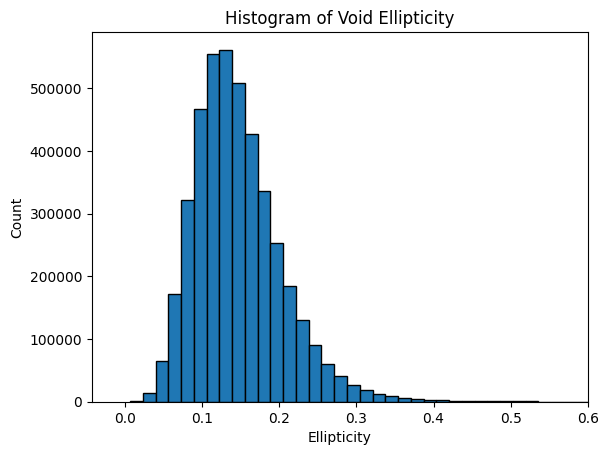

In [ ]:
plt.hist(input_params["ellipticity"], bins=60, histtype="bar", edgecolor="black")
plt.xlim(right=0.6)
plt.xlabel("Ellipticity")
plt.ylabel("Count")
plt.title("Histogram of Void Ellipticity")

In [ ]:
#Gaussian function
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt, pcov = curve_fit(gauss_function, x, y)

Text(0.5, 1.0, 'Histogram of Void Density Contrast')

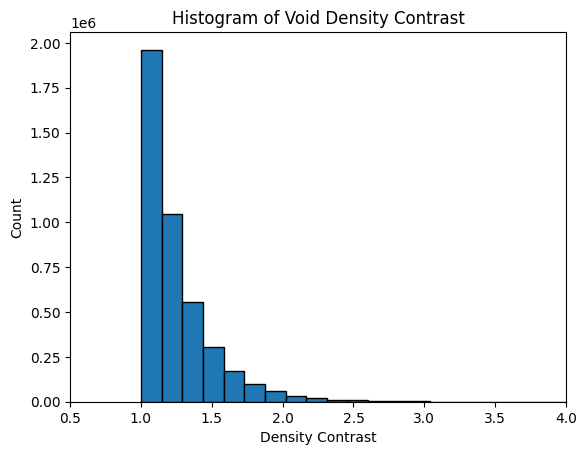

In [ ]:
plt.hist(input_params["density_contrast"], bins=1500, edgecolor="black")
plt.xlim(left=0.5, right=4)
plt.xlabel("Density Contrast")
plt.ylabel("Count")
plt.title("Histogram of Void Density Contrast")

In [ ]:
print(input_params)

         index  ellipticity  radius  density_contrast
0          0.0     0.198568  129.17          3.487631
1          0.0     0.162464  172.36          3.154508
2          0.0     0.118820   83.54          2.724835
3          0.0     0.120590   75.79          2.692753
4          0.0     0.101951   64.01          2.678991
...        ...          ...     ...               ...
4284713  999.0     0.131346   18.75          1.000166
4284714  999.0     0.183111   17.07          1.000152
4284715  999.0     0.196843   28.28          1.000123
4284716  999.0     0.213002   16.22          1.000094
4284717  999.0     0.108824   25.75          1.000037

[4284718 rows x 4 columns]


In [ ]:
sliced = input_params.iloc[:, 1:4]
print(sliced)

         ellipticity  radius  density_contrast
0           0.198568  129.17          3.487631
1           0.162464  172.36          3.154508
2           0.118820   83.54          2.724835
3           0.120590   75.79          2.692753
4           0.101951   64.01          2.678991
...              ...     ...               ...
4284713     0.131346   18.75          1.000166
4284714     0.183111   17.07          1.000152
4284715     0.196843   28.28          1.000123
4284716     0.213002   16.22          1.000094
4284717     0.108824   25.75          1.000037

[4284718 rows x 3 columns]


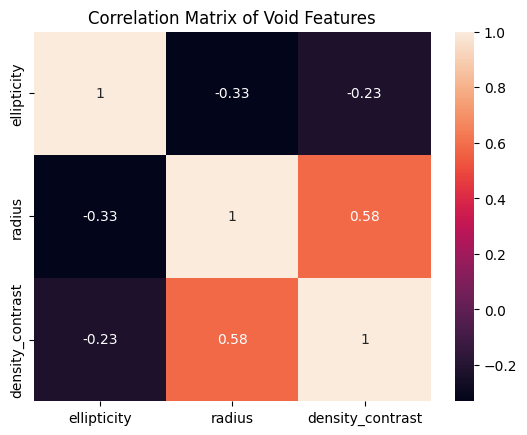

In [ ]:
import seaborn as sns

matrix = sliced.corr().round(2)

sns.heatmap(matrix, annot=True)
plt.title("Correlation Matrix of Void Features")
plt.show()

In [ ]:
print(cosmo_params.head())

   Unnamed: 0       0        1       2       3       4
0           0  0.1755  0.06681  0.7737  0.8849  0.6641
1           1  0.2139  0.05557  0.8599  0.9785  0.8619
2           2  0.1867  0.04503  0.6189  0.8307  0.7187
3           3  0.3271  0.06875  0.6313  0.8135  0.8939
4           4  0.1433  0.06347  0.6127  1.1501  0.7699


In [ ]:
cosmo_params = cosmo_params.drop(["Unnamed: 0"], axis=1)
print(cosmo_params.head())

        0        1       2       3       4
0  0.1755  0.06681  0.7737  0.8849  0.6641
1  0.2139  0.05557  0.8599  0.9785  0.8619
2  0.1867  0.04503  0.6189  0.8307  0.7187
3  0.3271  0.06875  0.6313  0.8135  0.8939
4  0.1433  0.06347  0.6127  1.1501  0.7699


In [ ]:
cosmo_params.columns = ["omega_m", "omega_b", "h", "n_s", "sigma_8"]
print(cosmo_params.head())

   omega_m  omega_b       h     n_s  sigma_8
0   0.1755  0.06681  0.7737  0.8849   0.6641
1   0.2139  0.05557  0.8599  0.9785   0.8619
2   0.1867  0.04503  0.6189  0.8307   0.7187
3   0.3271  0.06875  0.6313  0.8135   0.8939
4   0.1433  0.06347  0.6127  1.1501   0.7699
